In [3]:
# week 1

In [4]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# show RGB lena
img = cv2.imread('Lena.png')
cv2.imshow('Lena', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img)

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ..., 
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ..., 
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ..., 
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ..., 
 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ..., 
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ..., 
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ..., 
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


In [6]:
# img_crop
img_crop = img[150:350, 150:350, :]
cv2.imshow('img_crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
# save img_crop
cv2.imwrite('Lena_crop.png', img_crop)

True

In [7]:
# color split
B, G, R = cv2.split(img)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
# save
cv2.imwrite('B.png', B)
cv2.imwrite('G.png', G)
cv2.imwrite('R.png', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [15]:
# change color
def random_light_color(img):
    B, G, R = cv2.split(img)
    
    # change B
    B = B.astype('int')
    b_rand = random.randint(-50, 50)
    B = B + b_rand
    B[B > 255] = 255
    B[B < 0] = 0
    B = B.astype('uint8')
    # change G
    G = G.astype('int')
    g_rand = random.randint(-50, 50)
    G = G + g_rand
    G[G > 255] = 255
    G[G < 0] = 0
    G = G.astype('uint8')
    # change R
    R = R.astype('int')
    r_rand = random.randint(-50, 50)
    R = R + r_rand
    R[R > 255] = 255
    R[R < 0] = 0
    R = R.astype('uint8')
    # merge B, G, R
    img_merge = cv2.merge((B, G, R))
    return img_merge
img_random_color = random_light_color(img)
cv2.imwrite('img_random_color.png', img_random_color)
cv2.imshow('img_random_color', img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [8]:
# gamma correction

def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0 /gamma
    table = np.array([((i/255.0)**invGamma)*255 for i in np.arange(0, 256)])
    table = table.astype('uint8')
    return cv2.LUT(img, table)

img_darker = adjust_gamma(img, 0.5)
img_brighter = adjust_gamma(img, 2)
cv2.imshow('Original Lena', img)
cv2.imshow('Darker Lena', img_darker)
cv2.imshow('Brighter Lena', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
# save image
cv2.imwrite('Darker_Lena.png', img_darker)
cv2.imwrite('Brighter_Lena.png', img_brighter)

True

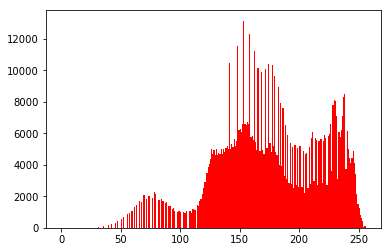

In [10]:
# histogram
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
plt.show()
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
cv2.imshow('img_yuv', img_yuv)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)

key = cv2.waitKey(0)
if key == 27:
    exit()

In [9]:
#rotation
import cv2
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imwrite('img_rotate.png', img_rotate)
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[   0.8660254     0.5         -93.70250337]
 [  -0.5           0.8660254   162.29749663]]


In [10]:
# set M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
# explain translation

[[   0.8660254     0.5         -93.70250337]
 [  -0.5           0.8660254   162.29749663]]


In [11]:
# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imwrite('similarity_transform.png', img_rotate)
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[   0.4330127     0.25         81.14874832]
 [  -0.25          0.4330127   209.14874832]]


In [12]:
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
cv2.imwrite('affine_transformation.png', dst)
cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [20]:
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)
    
    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imwrite('perspective_transform.png', img_warp
           )
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [25]:
# augment
def augment(img):
    # change color
    img_color = random_light_color(img)
    # rotation
    angle = random.randint(0, 361)
    M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), angle, 1) 
    img_rotate = cv2.warpAffine(img_color, M, (img.shape[1], img.shape[0]))
    # perspective transform
    M_warp, img_warp = random_warp(img_rotate, img.shape[0], img.shape[1])
    return img_warp
img_aug = augment(img)
cv2.imshow('img_aug', img_aug)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()